In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = [16, 8]
plt.rcParams.update({'font.size': 16})

In [3]:
theta = np.array([np.pi/15, -np.pi/9, -np.pi/20])
sigma = np.diag([3, 0.5, 0.5])

In [4]:
Rx = np.array([
    [1,0,0],
    [0,np.cos(theta[0]),-np.sin(theta[0])],
    [0,np.sin(theta[0]),np.cos(theta[0])]
    ])
Ry = np.array([
    [np.cos(theta[1]),0,np.sin(theta[1])],
    [0,1,0],
    [-np.sin(theta[1]),0,np.cos(theta[1])]
    ])
Rz = np.array([
    [np.cos(theta[2]),-np.sin(theta[2]),0],
    [np.sin(theta[2]),np.cos(theta[2]),0],
    [0,0,1]
    ])
R = Rx.dot(Ry).dot(Rz)  

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 1 (972904157.py, line 5)

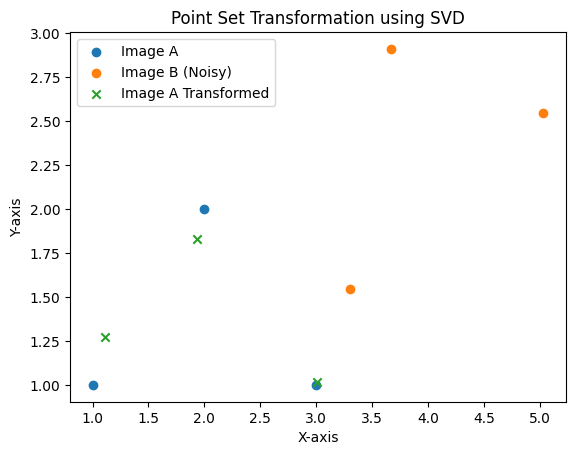

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一些示例数据
np.random.seed(42)

# 创建图像 A 中的特征点
points_a = np.array([[1, 1], [2, 2], [3, 1]])

# 定义刚体变换参数：平移和旋转
translation = np.array([2, 1])
rotation_angle = np.radians(30)  # 将角度转换为弧度
rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                            [np.sin(rotation_angle), np.cos(rotation_angle)]])

# 应用刚体变换到图像 A 上
points_b_transformed = np.dot((points_a - np.mean(points_a, axis=0)), rotation_matrix.T) + np.mean(points_a, axis=0) + translation

# 添加一些噪声
points_b_noisy = points_b_transformed # + 0.2 * np.random.randn(*points_b_transformed.shape)

# 使用SVD计算刚体变换参数
A = np.column_stack((points_a, np.ones(len(points_a))))
U, S, VT = np.linalg.svd(A, full_matrices=False)
V = VT.T
D = np.eye(3)
D[-1, -1] = np.linalg.det(np.dot(U, VT))

# 计算刚体变换矩阵
T = np.dot(np.dot(V, D), VT)


# 使用刚体变换矩阵将图像 A 的特征点变换到图像 B 的坐标系中
points_a_homogeneous = np.column_stack((points_a, np.ones(len(points_a))))
points_a_transformed_homogeneous = np.dot(T, points_a_homogeneous.T).T

# 转换后的特征点（去除齐次坐标）
points_a_transformed = points_a_transformed_homogeneous[:, :2]

# 绘制图像 A 和 B
plt.scatter(points_a[:, 0], points_a[:, 1], label='Image A')
plt.scatter(points_b_noisy[:, 0], points_b_noisy[:, 1], label='Image B (Noisy)')
plt.scatter(points_a_transformed[:, 0], points_a_transformed[:, 1], label='Image A Transformed', marker='x')

plt.legend()
plt.title('Point Set Transformation using SVD')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


In [10]:
# https://zhuanlan.zhihu.com/p/465490024
# https://blog.csdn.net/MyArrow/article/details/53709275
# https://stackoverflow.com/questions/66923224/rigid-registration-of-two-point-clouds-with-known-correspondence

In [19]:
import numpy as np

##Based on Arun et al., 1987

#Writing points with rows as the coordinates
p1_t = np.array([[0,0,0], [1,0,0],[0,1,0]])
p2_t = np.array([[0,0,1], [1,0,1],[0,0,2]]) #Approx transformation is 90 degree rot over x-axis and +1 in Z axis

#Take transpose as columns should be the points
p1 = p1_t.transpose()
p2 = p2_t.transpose()

#Calculate centroids
p1_c = np.mean(p1, axis = 1).reshape((-1,1)) #If you don't put reshape then the outcome is 1D with no rows/colums and is interpeted as rowvector in next minus operation, while it should be a column vector
p2_c = np.mean(p2, axis = 1).reshape((-1,1))

#Subtract centroids
q1 = p1-p1_c
q2 = p2-p2_c

#Calculate covariance matrix
H=np.matmul(q1,q2.transpose())

#Calculate singular value decomposition (SVD)
U, X, V_t = np.linalg.svd(H) #the SVD of linalg gives you Vt

#Calculate rotation matrix
R = np.matmul(V_t.transpose(),U.transpose())

assert np.allclose(np.linalg.det(R), 1.0), "Rotation matrix of N-point registration not 1, see paper Arun et al."

#Calculate translation matrix
T = p2_c - np.matmul(R,p1_c)

In [20]:
T

array([[1.66533454e-16],
       [0.00000000e+00],
       [1.00000000e+00]])

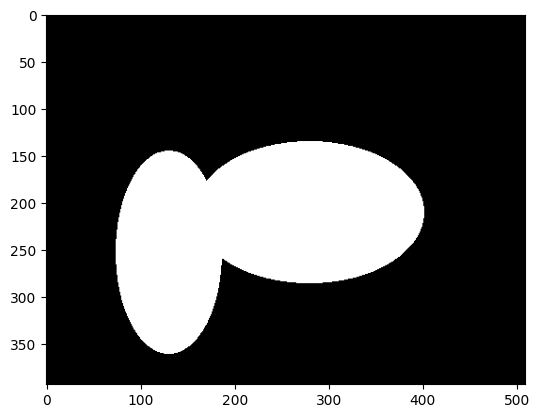

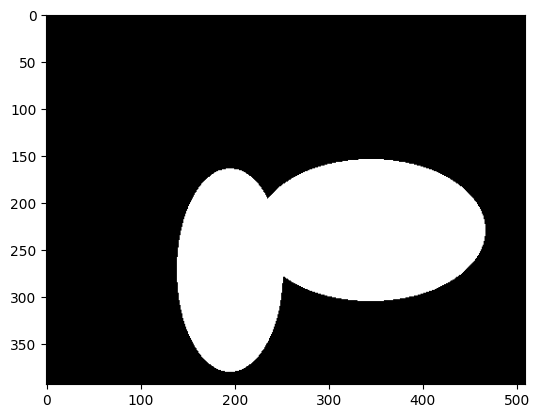

In [15]:
import cv2
imga = cv2.imread("./a.png", cv2.IMREAD_GRAYSCALE)
imgb = cv2.imread("./b.png", cv2.IMREAD_GRAYSCALE)
imga_b = imga.copy()
thda = imga_b.mean()
imga_b[imga_b < thda] = 0
imga_b[imga_b > thda] = 1
imgb_b = imgb.copy()
thdb = imgb_b.mean()
imgb_b[imgb_b < thdb] = 0
imgb_b[imgb_b > thdb] = 1
plt.imshow(imga_b, cmap='gray')
plt.show()
plt.imshow(imgb_b, cmap='gray')
plt.show()



In [16]:
pa = np.where(imga_b == 1)
print(pa)

(array([135, 135, 135, ..., 360, 360, 360], dtype=int64), array([267, 268, 269, ..., 133, 134, 135], dtype=int64))
